Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE`:

In [1]:
NAME = "Prach Techameena"


---

## Scientific libraries

### Setup

For this lab install the following libraries in your virtual environment

bash
~~~
$ source venv/bin/activate 
$ (venv) python -m pip install pandas matplotlib requests
~~~

windows
~~~
$ venv/Scripts/activate 
$ (venv) python -m pip install pandas matplotlib requests
~~~

In [2]:
import numpy as np
import pandas as pd
import numpy.testing as npt
import pandas.testing as pdt
import matplotlib.pyplot as plt
import requests
from IPython.display import Image, HTML

## Numpy

Complete the function with vector operations (no for-loops) so that the required functionality is obtained. Hint: https://www.python-course.eu/numpy_masking.php


### Assignment 1
Replace negative numbers in an array with zeros

In [3]:
def set_negative_to_zero(a):
    """
    Return a copy an array with negative value set to zero
    """
    # YOUR CODE HERE
    ################
    b = np.copy(a)
    b[b<0] = 0
    return b
    

set_negative_to_zero(np.array([1, 2, -3, 4, -5]))
#expected: array([1, 2, 0, 4, 0])

array([1, 2, 0, 4, 0])

In [4]:
a = np.array([1, 2, -3, 4, -5])
b = set_negative_to_zero(a)

# Verify that the original is unchanged
npt.assert_equal(a, [1, 2, -3, 4, -5])
# Verify that returned array has negative values set to zero
npt.assert_equal(b, [1, 2, 0, 4, 0])

Solve this "Math Genius" problem
with a one-line Python command

<img src="solve_me.png" width="400">

In [5]:
def solve_me():
    return (
    # YOUR CODE HERE
    ################
    np.sum(np.linalg.solve(np.array([[3,0,0],[-1,2,0],[0,1,1]]),np.array([39,25,44])))
    )
    
solve_me()

57.0

In [6]:
assert  solve_me() == 57

## Pandas

### Setup

In this section we are going to read from a movie database into pandas. There is some setup required for this

* Goto http://www.omdbapi.com
* Click API Key
* Select FREE and enter your email

You will get a personal code in your mailbox , save this in a file omdb.py in the same folder where you started jupyter:

~~~
#omdb.py
APIKEY='abcdef'
~~~

replacing 'abcdef' with your own key

In [7]:
from omdb import APIKEY


### Assignment 2

Consider the following function, it takes a search term calls the requests library (get) which and returns a dictionary object.

In [8]:
def search_omdb(title):
    url = f'https://www.omdbapi.com/?apikey={APIKEY}&s={title}'
    r = requests.get(url)
    if r.ok:
       return r.json()

search_omdb('tarzan')

{'Search': [{'Title': 'Tarzan',
   'Year': '1999',
   'imdbID': 'tt0120855',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BY2ZiYWUxN2ItYmQxZi00NDlkLWE2NDAtOTNmYTg1MDI0NDk1XkEyXkFqcGdeQXVyNjUwNzk3NDc@._V1_SX300.jpg'},
  {'Title': 'The Legend of Tarzan',
   'Year': '2016',
   'imdbID': 'tt0918940',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BMzY3OTI0OTcyMF5BMl5BanBnXkFtZTgwNjkxNTAwOTE@._V1_SX300.jpg'},
  {'Title': 'Greystoke: The Legend of Tarzan, Lord of the Apes',
   'Year': '1984',
   'imdbID': 'tt0087365',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BM2NmYjZjOGItYTQ0ZC00YjcyLTk3MWUtYzdmZjY1MGNkMDViXkEyXkFqcGdeQXVyNzc5MjA3OA@@._V1_SX300.jpg'},
  {'Title': 'Tarzan',
   'Year': '2013',
   'imdbID': 'tt1705952',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BMTQyODEwMTM2Nl5BMl5BanBnXkFtZTgwMTg1MTA3MDE@._V1_SX300.jpg'},
  {'Title': 'Tarzan 2: The Legend Begins',
   'Year': '20

Write a function that wraps the previous function search_omdb, and that returns

* a dataframe 
* has rows sorted by year
* and the imdbID field as index

In [9]:
def get_movies(title):
    r = search_omdb(title)
    # YOUR CODE HERE
    ################
    df = pd.DataFrame(r['Search'])
    df = df.set_index('imdbID')
    df = df.sort_values(by=['Year'])
    return df
get_movies('hamlet')

,Title,Year,Type,Poster
imdbID,,,,
tt0040416,Hamlet,1948,movie,https://m.media-amazon.com/images/M/MV5BMTQ5MT...
tt0053888,Hamlet,1960,movie,https://m.media-amazon.com/images/M/MV5BNDdhYj...
tt0064400,Hamlet,1969,movie,https://m.media-amazon.com/images/M/MV5BZmE5OG...
tt0093139,Hamlet liikemaailmassa,1987,movie,https://m.media-amazon.com/images/M/MV5BY2U1MW...
tt0099726,Hamlet,1990,movie,https://m.media-amazon.com/images/M/MV5BMjI5OT...
tt0116477,Hamlet,1996,movie,https://m.media-amazon.com/images/M/MV5BM2U5OW...
tt0171359,Hamlet,2000,movie,https://m.media-amazon.com/images/M/MV5BZTA0MW...
tt1104733,Hamlet 2,2008,movie,https://m.media-amazon.com/images/M/MV5BNDQyNj...
tt1449175,Hamlet,2009,movie,https://m.media-amazon.com/images/M/MV5BMTM0MT...


In [10]:
movies = get_movies('hamlet')
assert list(movies.columns) == ['Title', 'Year', 'Type', 'Poster']
assert movies.index.name == 'imdbID'
assert movies.Title.str.contains('hamlet', case=False).all()
assert movies.Year.iloc[0] == '1948'  # checks the year value of the first row

### Assignment 3
Given that the Image function can be used to display an image url

In [11]:
display(
Image(url='https://www.kth.se/files/avatar/sigbritt')
)

... write a function that takes a search term, calls get_movies and displays the posters that match the title

    display_posters('python')
    
use [the pandas method iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) to loop over the rows of a data frame

In [12]:
def display_posters(title):
    movies = get_movies(title)
    # YOUR CODE HERE
    ################
    pic = []
    for index, row in movies.iterrows():

        display(Image(url=row['Poster']))
    
         
        

In [13]:
get_movies('python')

,Title,Year,Type,Poster
imdbID,,,,
tt0071853,Monty Python and the Holy Grail,1975,movie,https://m.media-amazon.com/images/M/MV5BN2IyNT...
tt0075082,Police Python 357,1976,movie,https://m.media-amazon.com/images/M/MV5BNTFkZW...
tt0084352,Monty Python Live at the Hollywood Bowl,1982,movie,https://m.media-amazon.com/images/M/MV5BMTcxNj...
tt0213984,Parrot Sketch Not Included: Twenty Years of Mo...,1989,movie,https://m.media-amazon.com/images/M/MV5BMTkzND...
tt0151625,Monty Python & the Quest for the Holy Grail,1996,game,https://m.media-amazon.com/images/M/MV5BYjM5MW...
tt0209264,Python,2000,movie,https://m.media-amazon.com/images/M/MV5BZGZlNW...
tt0412523,Boa vs. Python,2004,movie,https://m.media-amazon.com/images/M/MV5BMTYwND...
tt1422182,Monty Python: Almost the Truth - The Lawyer's Cut,2009–,series,https://m.media-amazon.com/images/M/MV5BMTU1OT...
tt1680138,Mega Python vs. Gatoroid,2011,movie,https://m.media-amazon.com/images/M/MV5BMjEwOD...


In [14]:
display_posters('python')

### Assignment 4
Generate a bar plot with movie titles containing "horse" by year using

    plot_by_year('horse')
    
to generate a plot of the form

<img src="horse_titles.png">

In [15]:
def plot_by_year(title):
    # YOUR CODE HERE
    ################
    df = get_movies(title)
    df["Year"].value_counts().sort_index().plot(kind='bar')


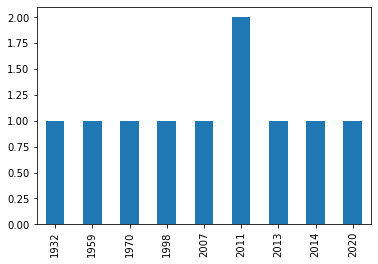

In [16]:
plot_by_year('horse')